In [32]:
import sys
sys.path.append('..')

In [53]:
from sklearn.cluster import KMeans

import pandas as pd
pd.set_option("display.float_format", lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import pickle

In [34]:
# loading the sameple datasets into DataFrames
data_1 = pd.read_csv("../data/1_space_cluster_samples.csv")
data_3 = pd.read_csv("../data/3_space_cluster_samples.csv")
data_5 = pd.read_csv("../data/5_space_cluster_samples.csv")
data_7 = pd.read_csv("../data/7_space_cluster_samples.csv")

# pulling the data that will be used to train the model out of the datasets and storing them to individual DataFrames
X_1 = data_1[[str(x) for x in range(1, 10)]].values
X_3 = data_3[[str(x) for x in range(1, 10)]].values
X_5 = data_5[[str(x) for x in range(1, 10)]].values
X_7 = data_7[[str(x) for x in range(1, 10)]].values

# putting the training data into a list so we can iteratively test models
A = [X_1, X_3, X_5, X_7]

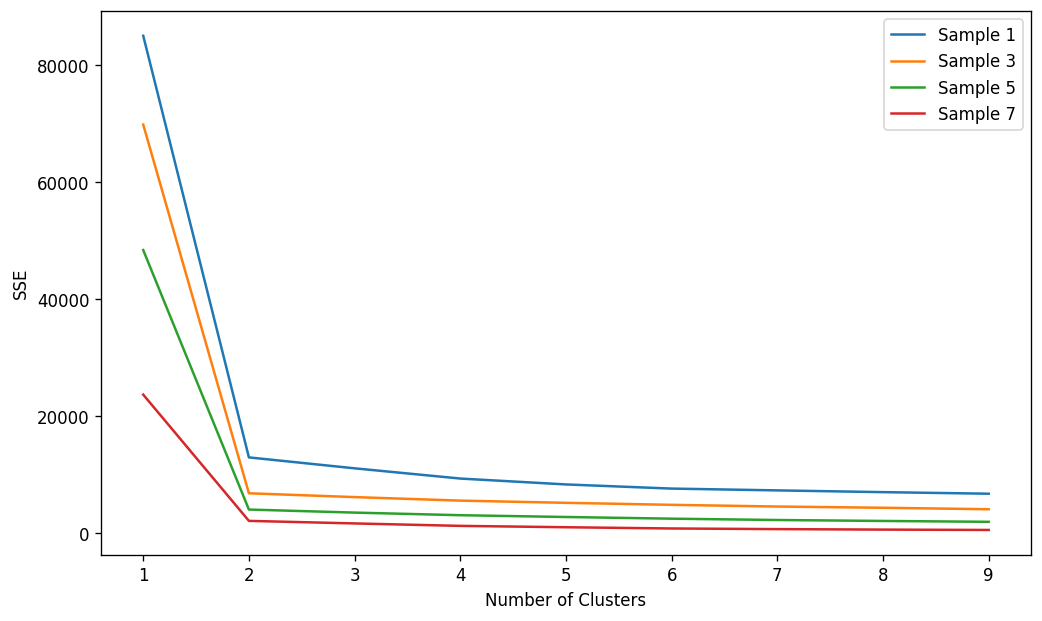

In [65]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(A):
    sse = dict()
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=2500).fit(df)
        sse[k] = kmeans.inertia_ # sum of squared euclidian distance from each point to its closest centroid
    plt.plot(list(sse.keys()), list(sse.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc="upper right")
plt.show()

There is a clearly defined elbow at k=2 clusters in all 4 sample sets.

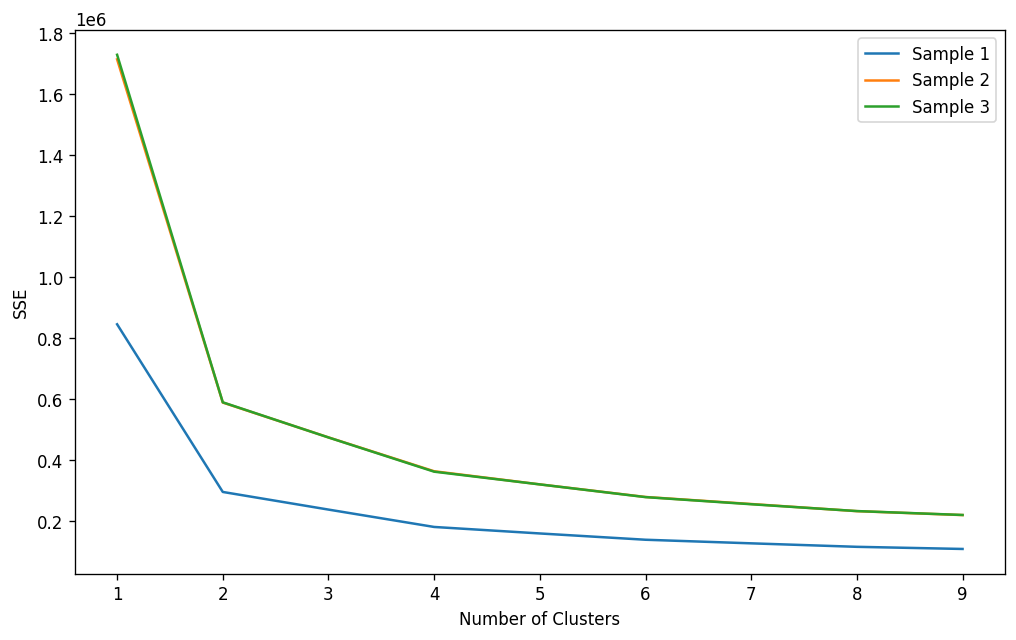

In [62]:
train_W = pd.read_csv("../data/5k_mixed.csv")
train_X = pd.read_csv("../data/10k_mixed.csv")
train_Z = pd.read_csv("../data/50k_mixed.csv")

W = train_W[[str(x) for x in range(1, 10)]].values
X = train_X[[str(x) for x in range(1, 10)]].values
Z = train_Z[[str(x) for x in range(1, 10)]].values

V = [W, X, Z]

all_err = dict()

plt.figure(figsize=(10, 6), dpi=120)
for ct, d in enumerate(V):
    sse = dict()
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, max_iter=2500).fit(d)
        sse[i] = kmeans.inertia_
    plt.plot(list(sse.keys()), list(sse.values()), label=f"Sample {ct + 1}")
    # sse["sum"] = sum(sse.values())
    all_err[ct + 1] = sse
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc="upper right")
plt.show()

Our SSE converges at approximately 600000 for n=2 clusters

In [68]:
# training the model to save using the largest dataset
model = KMeans(n_clusters=2)
model.fit(Z)

# verifying that the model works before saving
model.predict(W)

array([1, 0, 1, ..., 0, 1, 0])

In [69]:
# saving
pickle.dump(model, open("../model_binaries/kmeans.sav", "wb"))